Importing necessary libraries such as cv2,numpy,matplotlib


In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Establishing the Neural Network and creating BLOB

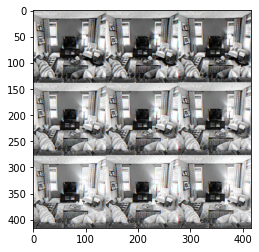

In [ ]:
yolo=cv2.dnn.readNet("/content/yolov3-tiny.weights","/content/yolov3-tiny.cfg")
classes=[]
with open("/content/coco.names",'r') as f:
 classes=f.read().splitlines()
layer_names = yolo.getLayerNames() 
output_layers = [layer_names[i[0] - 1] for i in yolo.getUnconnectedOutLayers()]
img=cv2.imread("/content/home.jpg")
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
i=blob.reshape(416,416,3)
plt.imshow(i)


In [ ]:
yolo.setInput(blob)
layeroutput= yolo.forward(output_layers)
boxs=[]
confidences=[]
classids=[]
height, width,channels= img.shape
for output in layeroutput:
  for detection in output:
    score=detection[5:]
    classid=np.argmax(score)
    confidence=score[classid]
    if confidence>0.2:
      cx=int(detection[0]*width)
      cy=int(detection[1]*height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)
      x=int(cx-w/2)
      y=int(cy-h/2)
      boxs.append([x,y,w,h])
      confidences.append(float(confidence))
      classids.append(classid)

Adding bounding boxes to objects

In [ ]:
indexes=cv2.dnn.NMSBoxes(boxs,confidences,0.4,0.3)
font=cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxs)):
 if i in indexes:
  x,y,w,h=boxs[i]
  label=str(classes[classids[i]])
  con=str(round(confidences[i],2))
  color = colors[classids[i]]
  cv2.rectangle(img, (x, y), (x + w, y + h), color,1)
  cv2.putText(img,label+" "+con,(x,y+30),font,1,(255,255,255),1)

Final Image

True

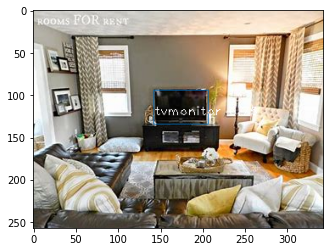

In [ ]:
plt.imshow(img)
cv2.imwrite("./img.jpg",img)